In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Explore order reviews dataset
review_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
review_data.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [6]:
# How many unique orders have reviews?
review_data["order_id"].nunique()

98673

In [7]:
# What is the average review score?
review_data["review_score"].mean().round(2)

4.09

In [8]:
# What is the most common review score?
review_data["review_score"].value_counts().sort_values(ascending = False).index[0]

5

In [9]:
# How many reviews have no comment message?
review_data[review_data["review_comment_message"].isna()].shape[0]

58247

In [10]:
# How many reviews have no title but have a message?
review_data[(review_data["review_comment_title"].isna()) & (~review_data["review_comment_message"].isna())].shape[0]

31138

In [11]:
# Count of reviews for each score (1 to 5)?
review_data.groupby("review_score").size().reset_index(name = "review_count")

,review_score,review_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [12]:
# How many 5-star reviews are there?
review_data[review_data["review_score"] == 5].shape[0]

57328

In [13]:
# How many 1-star reviews are there?
review_data[review_data["review_score"] == 1].shape[0]

11424

In [14]:
# What is the earliest and latest review creation date?
earliest_date = review_data["review_creation_date"].min()
latest_date = review_data["review_creation_date"].max()
pd.to_datetime(earliest_date).strftime('%Y-%m-%d'), pd.to_datetime(latest_date).strftime('%Y-%m-%d')

('2016-10-02', '2018-08-31')

In [15]:
# Average review score per day?
review_data["review_creation_date"] = pd.to_datetime(review_data["review_creation_date"])
avg_review_per_day = (
    review_data.groupby("review_creation_date")["review_score"]
    .mean().round(2)
    .reset_index(name = "average_score")
    .sort_values(by = "review_creation_date", ascending = True)
)
avg_review_per_day["review_creation_date"] = avg_review_per_day["review_creation_date"].dt.strftime('%Y-%m-%d')
avg_review_per_day.head(10)

,review_creation_date,average_score
0,2016-10-02,1.00
1,2016-10-06,1.00
2,2016-10-09,1.00
3,2016-10-15,4.00
4,2016-10-16,5.00
5,2016-10-18,4.83
6,2016-10-19,4.80
7,2016-10-20,4.29
8,2016-10-21,4.20
9,2016-10-22,3.64


In [16]:
# Average review score per month?
avg_review_per_month = (
    review_data.groupby(review_data["review_creation_date"].dt.to_period("M"))["review_score"]
    .mean().round(2)
    .reset_index(name = "average_score")
    .sort_values(by = "review_creation_date", ascending = True)
)
avg_review_per_month["review_creation_date"] = avg_review_per_month["review_creation_date"].dt.strftime('%Y-%m-%d')
avg_review_per_month.head(10)

,review_creation_date,average_score
0,2016-10-31,4.06
1,2016-11-30,3.19
2,2016-12-31,2.36
3,2017-01-31,4.34
4,2017-02-28,4.28
5,2017-03-31,4.03
6,2017-04-30,4.04
7,2017-05-31,4.10
8,2017-06-30,4.13
9,2017-07-31,4.18


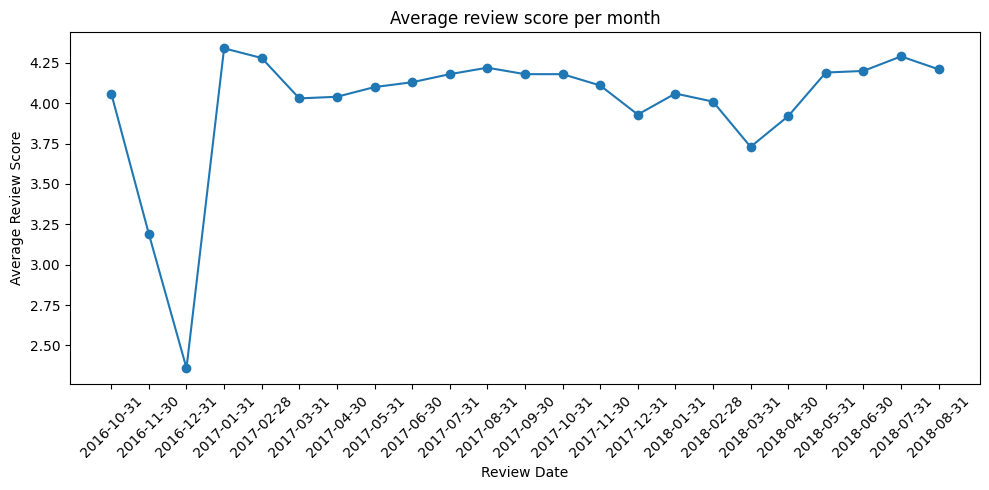

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(avg_review_per_month["review_creation_date"], avg_review_per_month["average_score"], linestyle = "-", marker = "o")
plt.title("Average review score per month")
plt.xlabel("Review Date")
plt.ylabel("Average Review Score")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [18]:
# Which day had the most reviews?
review_data.groupby("review_creation_date").size().sort_values(ascending = False)[:1]

review_creation_date
2017-12-19    463
dtype: int64

In [19]:
# How many reviews were created each month?
review_per_month = (
    review_data.groupby(review_data["review_creation_date"].dt.to_period("M"))
    .size()
    .reset_index(name = "review_count")
    .sort_values("review_creation_date", ascending = False)
)
review_per_month.head(10)

,review_creation_date,review_count
22,2018-08,8987
21,2018-07,5634
20,2018-06,6715
19,2018-05,7458
18,2018-04,7287
17,2018-03,7803
16,2018-02,6101
15,2018-01,6179
14,2017-12,7982
13,2017-11,4786


In [20]:
# What is the average time taken to respond to a review? (review_answer_timestamp - review_creation_date)
review_data["review_answer_timestamp"] = pd.to_datetime(review_data["review_answer_timestamp"])
valid_reviews = review_data.dropna(subset=["review_creation_date", "review_answer_timestamp"])
valid_reviews = valid_reviews.loc[valid_reviews["review_answer_timestamp"] > valid_reviews["review_creation_date"]]

valid_reviews["response_time_in_days"] = (
    valid_reviews["review_answer_timestamp"] - valid_reviews["review_creation_date"]
).dt.total_seconds() / (3600 * 24)

average_response_time = valid_reviews["response_time_in_days"].mean().round(2)
average_response_time

3.15

In [21]:
# Which review has the longest message?
def find_str_len(text):
    if text is np.nan or text == "":
        return 0
    else:
        return len(text)
        
higest_text_index = (
    review_data["review_comment_message"]
    .apply(lambda x: find_str_len(x))
    .sort_values(ascending = False)
    .index[0]
)
review_data.loc[higest_text_index]["review_id"]

'11eb20303bc6c13c41eeb1496e64aa97'

In [22]:
# What percentage of reviews had a comment message?
valid_message_count = review_data[review_data["review_comment_message"].notnull()]
perc_comment_message = np.round(((valid_message_count.shape[0] / review_data.shape[0]) * 100), 2)
perc_comment_message

41.3

In [23]:
# What is the distribution of review scores over time (month/year)?
distribution = (
    valid_reviews.groupby([valid_reviews["review_creation_date"].dt.to_period("M"), "review_score"])
    .size()
    .reset_index(name = "review_count")
)
distribution.head(10)

,review_creation_date,review_score,review_count
0,2016-10,1,25
1,2016-10,2,4
2,2016-10,3,13
3,2016-10,4,31
4,2016-10,5,106
5,2016-11,1,34
6,2016-11,2,4
7,2016-11,3,8
8,2016-11,4,19
9,2016-11,5,36


In [24]:
distribution["review_month"] = distribution["review_creation_date"].dt.to_timestamp()
fig = px.line(distribution, x = "review_month", y = "review_count", labels = {"review_month": "Date", "review_count": "Reviews"}, title = "Review Distribution per month")
fig.show()

In [25]:
# Which review score has the fastest average response time?
valid_reviews["response_in_seconds"] = (
    valid_reviews["review_answer_timestamp"] - valid_reviews["review_creation_date"]
).dt.total_seconds()

avg_response_time = (
    valid_reviews.groupby("review_score")["response_in_seconds"]
    .mean()
    .reset_index(name = "avg_seconds")
    .sort_values("avg_seconds", ascending = False)
)
avg_response_time["review_score"].values[0]

5

In [26]:
# Find top 5 days with the most 5-star reviews?
review_5_star = valid_reviews[valid_reviews["review_score"] == 5]
review_5_star = (
    review_5_star.groupby(["review_score", "review_creation_date"])
    .size()
    .reset_index(name = "review_count")
    .sort_values("review_count", ascending = False)
    .head(5)
)
review_5_star

,review_score,review_creation_date,review_count
610,5,2018-08-28,301
583,5,2018-07-31,273
507,5,2018-05-15,272
514,5,2018-05-22,271
584,5,2018-08-01,270


In [27]:
# Count of reviews by presence of title and/or message?
both_present = review_data[
    (review_data["review_comment_title"].notnull()) &
    (review_data["review_comment_message"].notnull())
].shape[0]

only_title = review_data[
    (review_data["review_comment_title"].notnull()) &
    (review_data["review_comment_message"].isna())
].shape[0]

only_message = review_data[
    (review_data["review_comment_title"].isna()) &
    (review_data["review_comment_message"].notnull())
].shape[0]

neither = review_data[
    (review_data["review_comment_title"].isna()) &
    (review_data["review_comment_message"].isna())
].shape[0]

summary = {
    "Both message & title": both_present,
    "Only title": only_title,
    "Only message": only_message,
    "Neither": neither
}
pd.DataFrame.from_dict(summary, orient = "index", columns = ["review_count"])

,review_count
Both message & title,9839
Only title,1729
Only message,31138
Neither,56518


In [28]:
# Which orders have multiple reviews?
order_multiple_reviews = (
    review_data.groupby(["order_id"])["review_id"]
    .agg(lambda x: ", ".join(x))
    .reset_index(name = "review_ids")
)
order_multiple_reviews["review_count"] = order_multiple_reviews["review_ids"].str.count(",") + 1
order_multiple_reviews = order_multiple_reviews[order_multiple_reviews["review_count"] > 1]
order_multiple_reviews.head(10)

,order_id,review_ids,review_count
84,0035246a40f520710769010f752e7507,"2a74b0559eb58fc1ff842ecc999594cb, 89a02c45c340...",2
461,013056cfe49763c6f66bda03396c5ee3,"ab30810c29da5da8045216f0f62652a2, 73413b847f63...",2
556,0176a6846bcb3b0d3aa3116a9a768597,"830636803620cdf8b6ffaf1b2f6e92b2, d8e8c42271c8...",2
835,02355020fd0a40a0d56df9f6ff060413,"017f0e1ea6386de662cbeba299c59ad1, 0c8e7347f1cd...",2
985,029863af4b968de1e5d6a82782e662f5,"04d945e95c788a3aa1ffbee42105637b, 61fe4e7d1ae8...",2
1092,02e0b68852217f5715fb9cc885829454,"2eab0b2e6f5bded4d9b0b2afcfdf4534, fa493ead9b09...",2
1103,02e723e8edb4a123d414f56cc9c4665e,"38821b5c496b678cf91acc34892805ad, 39b4603793c1...",2
1272,03515a836bb855b03f7df9dee520a8fc,"1dee9d450a2b8533d2085cef898ca4a2, 5e1ee2e924a1...",2
1455,03c939fd7fd3b38f8485a0f95798f1f6,"b04ed893318da5b863e878cd3d0511df, f4bb9d6dd4fb...",3
1510,03eba6d9fef8f5b3e811d4b5a7cca9cd,"36ce47fb903bec726f89c65eac26dc9f, 55bff212ccac...",2


In [29]:
# Which review scores have the most detailed feedback (longest messages)?
avg_review_message = (
    review_data[review_data["review_comment_message"].notnull()]
    .groupby("review_score")["review_comment_message"]
    .agg(lambda x: len(x))
    .reset_index(name = "message_length")
    .sort_values("message_length", ascending = False)
)
avg_review_message

,review_score,message_length
4,5,20554
0,1,8745
3,4,5976
2,3,3557
1,2,2145


In [30]:
# Monthly average review score and trend (increasing/decreasing)?
monthly_average_score = (
    valid_reviews.groupby(valid_reviews["review_creation_date"].dt.to_period("M"))["review_score"]
    .mean().round(2)
    .reset_index(name = "average_count")
)
monthly_average_score.head(10)

,review_creation_date,average_count
0,2016-10,4.06
1,2016-11,3.19
2,2016-12,2.36
3,2017-01,4.34
4,2017-02,4.28
5,2017-03,4.03
6,2017-04,4.04
7,2017-05,4.10
8,2017-06,4.13
9,2017-07,4.18


In [31]:
# Create a summary table: score, total reviews, avg response time, % with message?
summary_tbl = (
    valid_reviews.groupby("review_score")
    .agg(
        total_reviews = ("review_id", "size"),
        avg_response_time = ("response_time_in_days", "mean"),
        message_count = ("review_comment_message", lambda x: x.notnull().sum())
    )
    .reset_index()
)
summary_tbl["perc_with_message"] = np.round((summary_tbl["message_count"] / summary_tbl["total_reviews"]) * 100, 2)
summary_tbl.head(10)

,review_score,total_reviews,avg_response_time,message_count,perc_with_message
0,1,11424,3.050730,8745,76.55
1,2,3151,3.004119,2145,68.07
2,3,8179,2.981170,3557,43.49
3,4,19142,3.120431,5976,31.22
4,5,57328,3.210018,20554,35.85


In [32]:
# Find the average delay (in hours) between review creation and answer by day?
valid_reviews["delay_in_hr"] = (
    valid_reviews["review_answer_timestamp"] - valid_reviews["review_creation_date"]
).dt.total_seconds() / 3600

valid_reviews["review_day"] = valid_reviews["review_creation_date"].dt.date

avg_delay_in_hr = (
    valid_reviews.groupby("review_day")["delay_in_hr"]
    .mean().round(2)
    .reset_index(name = "avg_delay")
)
avg_delay_in_hr.head(10)

,review_day,avg_delay
0,2016-10-02,588.52
1,2016-10-06,42.54
2,2016-10-09,62.52
3,2016-10-15,48.19
4,2016-10-16,14.75
5,2016-10-18,376.59
6,2016-10-19,285.91
7,2016-10-20,352.98
8,2016-10-21,88.48
9,2016-10-22,97.64


In [33]:
# Find reviews that were responded to more than 7 days after creation?
valid_reviews[valid_reviews["response_time_in_days"] > 7]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time_in_days,response_in_seconds,delay_in_hr,review_day
21,80c70bc263881ba6525f6cee1d94ac87,ae168dfba236919411fe08f336fefa44,5,NaN,NaN,2018-03-17,2018-04-04 19:41:11,18.820266,1626071.0,451.686389,2018-03-17
23,7bcb3c758c67f23638262c731493e848,7c9956750739a47dba7a6928ba2f0245,5,NaN,NaN,2017-09-09,2017-10-17 02:25:47,38.101238,3291947.0,914.429722,2017-09-09
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01,2017-12-09 22:58:58,8.957616,773938.0,214.982778,2017-12-01
27,fe3db7c069d694bab50cc43463f91608,2ca73e2ff9e3a186ad1e1ffb9b1d9c10,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,2018-03-23,2018-04-01 00:27:51,9.019340,779271.0,216.464167,2018-03-23
37,2170c9452c2216457b36003fe2969fbb,af32671d0b8ce510a94d9111d97371d3,5,NaN,muito boa,2018-03-22,2018-03-30 23:37:25,8.984317,776245.0,215.623611,2018-03-22
...,...,...,...,...,...,...,...,...,...,...,...
99188,4118da0624b51167015263892a070967,7d5f037cd90e278069b2d0fd0d060543,5,NaN,NaN,2018-04-25,2018-05-03 01:31:52,8.063796,696712.0,193.531111,2018-04-25
99198,445a7bd5ce7f7bc9c28a5844c2466acc,2d687102eef8e4949a9d2af49e8fa946,3,NaN,NaN,2017-12-19,2017-12-28 16:51:12,9.702222,838272.0,232.853333,2017-12-19
99200,2ee221b28e5b6fceffac59487ed39348,f2d12dd37eaef72ed7b1186b2edefbcd,2,Foto enganosa,Foto muito diferente principalmente a graninha...,2018-03-28,2018-05-25 01:23:26,58.057940,5016206.0,1393.390556,2018-03-28
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,12.824572,1108043.0,307.789722,2018-02-07


In [34]:
# What is the standard deviation of review scores per month?
review_score_per_month = (
    valid_reviews.groupby(valid_reviews["review_creation_date"].dt.to_period("M"))["review_score"]
    .std().round(2)
    .reset_index(name = "std_per_month")
)
review_score_per_month.head(10)

,review_creation_date,std_per_month
0,2016-10,1.42
1,2016-11,1.73
2,2016-12,1.87
3,2017-01,1.16
4,2017-02,1.16
5,2017-03,1.38
6,2017-04,1.36
7,2017-05,1.31
8,2017-06,1.30
9,2017-07,1.26


In [35]:
# Find reviews created and answered on the same day?
valid_reviews["response_in_int_day"] = (valid_reviews["review_answer_timestamp"] - valid_reviews["review_creation_date"]).dt.days
answe_in_same_day = valid_reviews[valid_reviews["response_in_int_day"] == 0]
answe_in_same_day.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time_in_days,response_in_seconds,delay_in_hr,review_day,response_in_int_day
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0.907627,78419.0,21.783056,2018-01-18,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0.918125,79326.0,22.035000,2017-04-21,0
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06,0.900069,77766.0,21.601667,2018-08-14,0
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37,0.174039,15037.0,4.176944,2018-08-15,0
26,bf566b3910c328733baf7fca7d2be041,a59a15e4b6085c752d338431dc68d464,4,NaN,NaN,2017-11-01,2017-11-01 20:25:30,0.851042,73530.0,20.425000,2017-11-01,0
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18,2018-01-18 19:12:30,0.800347,69150.0,19.208333,2018-01-18,0
36,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5,Bom,"Recomendo ,",2018-06-13,2018-06-13 22:54:44,0.954676,82484.0,22.912222,2018-06-13,0
53,1edd1a85161468a77e5fcb165be9b294,d8e17cc85323061493b16b68a130bcff,5,Ótimo,NaN,2018-06-02,2018-06-02 23:15:37,0.969178,83737.0,23.260278,2018-06-02,0
57,45a523faa4defdf60118a90301b8a23e,26c4ac9998f72d4fcdca3c6e27089f1b,3,NaN,NaN,2017-10-27,2017-10-27 16:12:52,0.675602,58372.0,16.214444,2017-10-27,0
59,500c05500aa275953129f49799ee5c73,8a9424899aac432d80d8e580932b5ee9,5,MT lindo,MT lindo,2018-07-25,2018-07-25 21:37:22,0.900949,77842.0,21.622778,2018-07-25,0


In [36]:
from pandas.api.types import CategoricalDtype
# What is the average review score per weekday (e.g., Monday, Tuesday)?
valid_reviews["review_day"] = valid_reviews["review_creation_date"].dt.day_name()
average_review_per_weekday = (
    valid_reviews.groupby("review_day")["review_score"]
    .mean().round(2)
    .reset_index(name = "avg_review")
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_cat = CategoricalDtype(categories = weekday_order, ordered = True)
average_review_per_weekday["review_day"] = average_review_per_weekday["review_day"].astype(weekday_cat)
average_review_per_weekday = average_review_per_weekday.sort_values("review_day")
average_review_per_weekday.head(10)

,review_day,avg_review
1,Monday,4.25
5,Tuesday,4.28
6,Wednesday,4.10
4,Thursday,4.09
0,Friday,4.07
2,Saturday,4.06
3,Sunday,3.59


In [37]:
tab10_colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd', '#8c564b','#e377c2']
fig = px.bar(average_review_per_weekday,  x = "review_day", y = "avg_review", color = tab10_colors, labels = {"review_day": "Weekday", "avg_review": "Review"})
fig.show()